# Random Number Generators

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Mid Square Method

In [2]:
def mid_square_random_number(z0 = 1234, n = 1):
    if len(str(z0)) != 4:
        print("z0 must be 4 digits")
        return
    zs = [z0/10000]
    for i in range(n-1):
        z0_sq = str(int(z0)**2)
        if len(z0_sq) == 7:
            z0_sq = '0' + z0_sq
        z1 = z0_sq[2:6]
        zs.append(int(z1)/10000)
        z0 = z1
    return zs

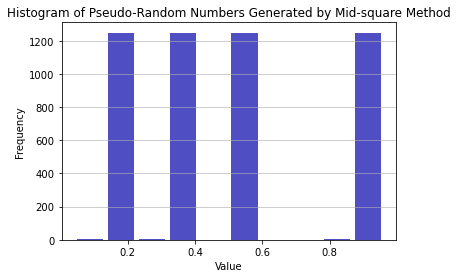

In [3]:
zs = mid_square_random_number(n = 5000)

n, bins, patches = plt.hist(x=zs, bins=10, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Pseudo-Random Numbers Generated by Mid-square Method')
plt.show()

### Linear Congruential Generator (LCG)

In [4]:
def lcg_random_numer(z0 = 1, a = 1229, c = 1, m = 2048, n = 1):
    zs = [z0]
    for i in range(n-1):
        znew = (a*z0 + c) % m
        zs.append(znew)
        z0 = znew
    return zs

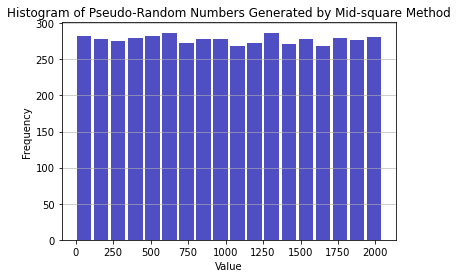

In [5]:
zs = lcg_random_numer(n = 5000)

n, bins, patches = plt.hist(x=zs, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Pseudo-Random Numbers Generated by Mid-square Method')
plt.show()

Are they independent?

In [6]:
np.corrcoef(zs[0:len(zs)-1], zs[1:len(zs)])

array([[1.        , 0.20093056],
       [0.20093056, 1.        ]])

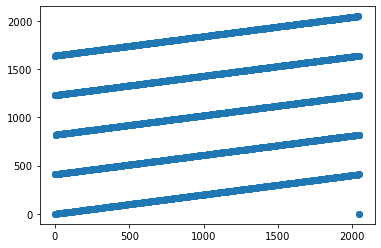

In [7]:
plt.scatter(zs[0:len(zs)-1], zs[1:len(zs)])
plt.show()

Different parameters, more independent

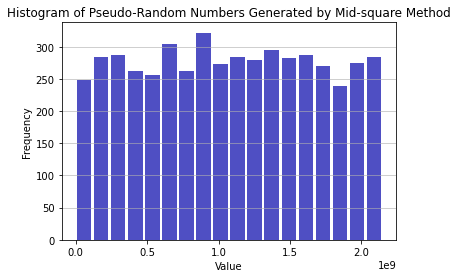

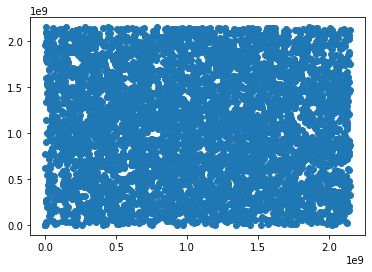

In [8]:
zs = lcg_random_numer(a = 2**(16) + 3, c = 0, m = 2**(31), n = 5000)

n, bins, patches = plt.hist(x=zs, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Pseudo-Random Numbers Generated by Mid-square Method')
plt.show()

plt.scatter(zs[0:len(zs)-1], zs[1:len(zs)])
plt.show()

### Multiplicative congruential generators

In [9]:
def mcg_random_number(z0 = 1, a = 1229, m = 2048, n = 1):
    return lcg_random_numerm_number(z0 = z0, a = a, m = m, c = 0, n = n)

### Additive congruential generators

In [10]:
def lcg_random_numer(z0 = 1, k = 3, m = 189, n = 1):
    zs = [z0] # index 0
    for i in range(1,n-1):
        if i < k:
            zs.append(z0)
        if i >= k:
            zs.append((zs[i-1] + zs[i-k])%m)
    return zs

Check this should be fibonacci

In [11]:
zs = lcg_random_numer(k = 2, n = 10)
zs

[1, 1, 2, 3, 5, 8, 13, 21, 34]